In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# 1. Iris Data Analysis
The Iris Dataset is a multivariate dataset introduced by Sir Ronald Aylmer Fisher in 1936. It contains 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

To begin analyzing the relationships among different variables, correlation heatmaps are a valuable tool that can provide insight into relations between variables.

C:\Users\ishaa\AppData\Local\Temp\ipykernel_15336\3129438174.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True, cmap='coolwarm')


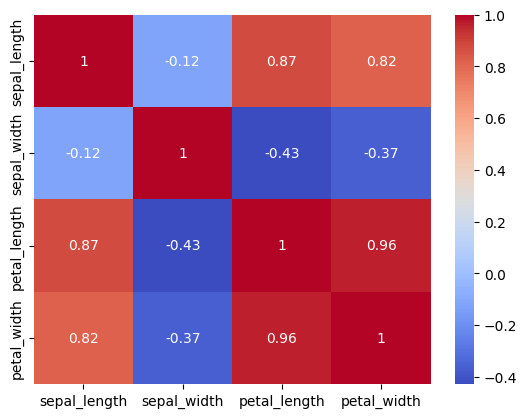

In [5]:
import seaborn as sns
import pandas as pd

iris = sns.load_dataset('iris')
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm')
plt.show()

From the above visualization, we can see:
1. `petal_length` and `petal_width` are highly correlated, while `sepal_length` and `sepal_width` are moderately correlated.

To visualize the relationships among different variables, we can create a scatter plot matrix as follows:

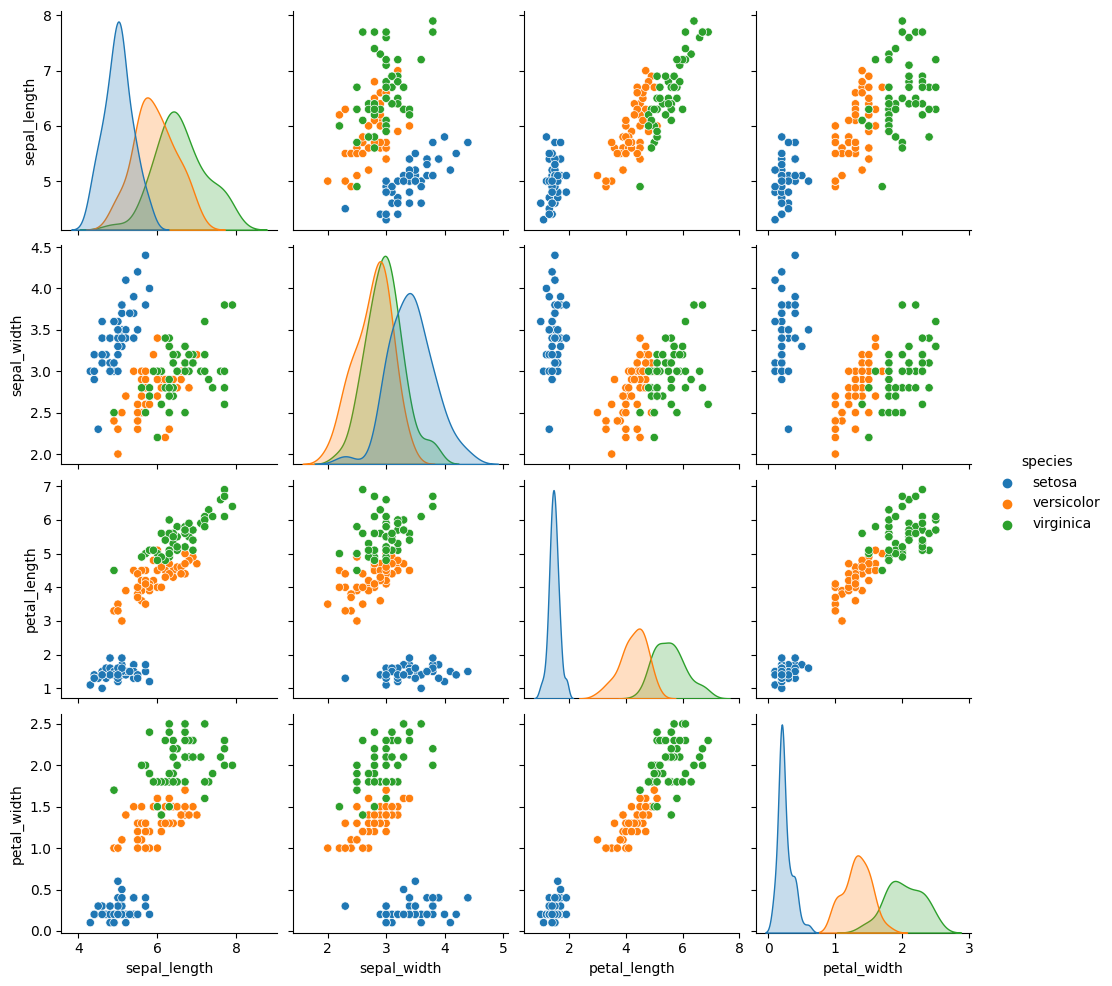

In [6]:
iris = sns.load_dataset('iris')
sns.pairplot(data=iris, hue='species')
plt.show()

From the scatter plot matrix, we can see that there is a clear linear relationship between `petal_length` and `petal_width`.

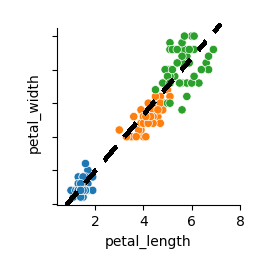

This relationship is evident in all three species of Iris. There is also some separation between the species based on petal
length and width, but it is not as clear.
We can also see that `petal_length` and `petal_width` have a stronger correlation with the species than `sepal_length` and
`sepal_width`.

# 2. Linear Separability
To determine which class is linearly separable, we can use a support vector machine (SVM) classifier. SVMs are commonly used for binary classification problems and can determine whether the classes are linearly separable or not.

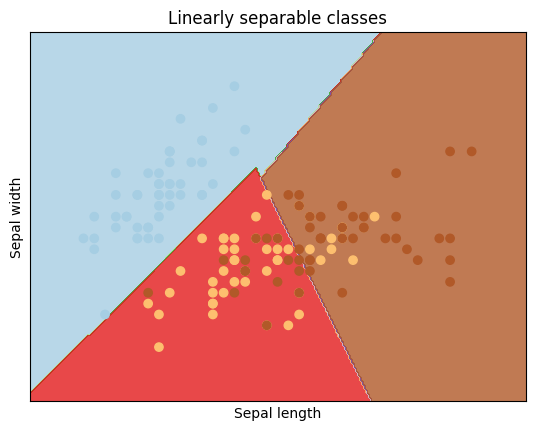

In [7]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes
y = iris.target

# Train an SVM classifier
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Linearly separable classes')
plt.show()

From the above visualization, we can see that the classes are more or less linearly separable in the Iris dataset. The `Setosa` (blue) samples are clearly linearly separated from `Versicolor` and `Virginica`, however there is some confusion between `Versicolor` (red) and `Virginica` (brown).

# 3. EDA: UCI Adult Dataset
We will use EDA to analyse the dataset. First, we load the dataset by downloading it from the website link given.

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "UCIAdult_dataset/adult.data"
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
         "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
         "hours-per-week", "native-country", "income"]
df = pd.read_csv(url, header=None, names=names)
df.drop_duplicates(inplace=True)
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


There are 14 columns: `["age", "workclass", "fnlwgt", "education", education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]`

These columns include information about individuals such as age, workclass, education, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, and native country. The final column, `"income"`, indicates whether the individual makes more or less than $50,000 per year.

Let us visualize the distribution of the target variable, `"income"`, across the other variables:

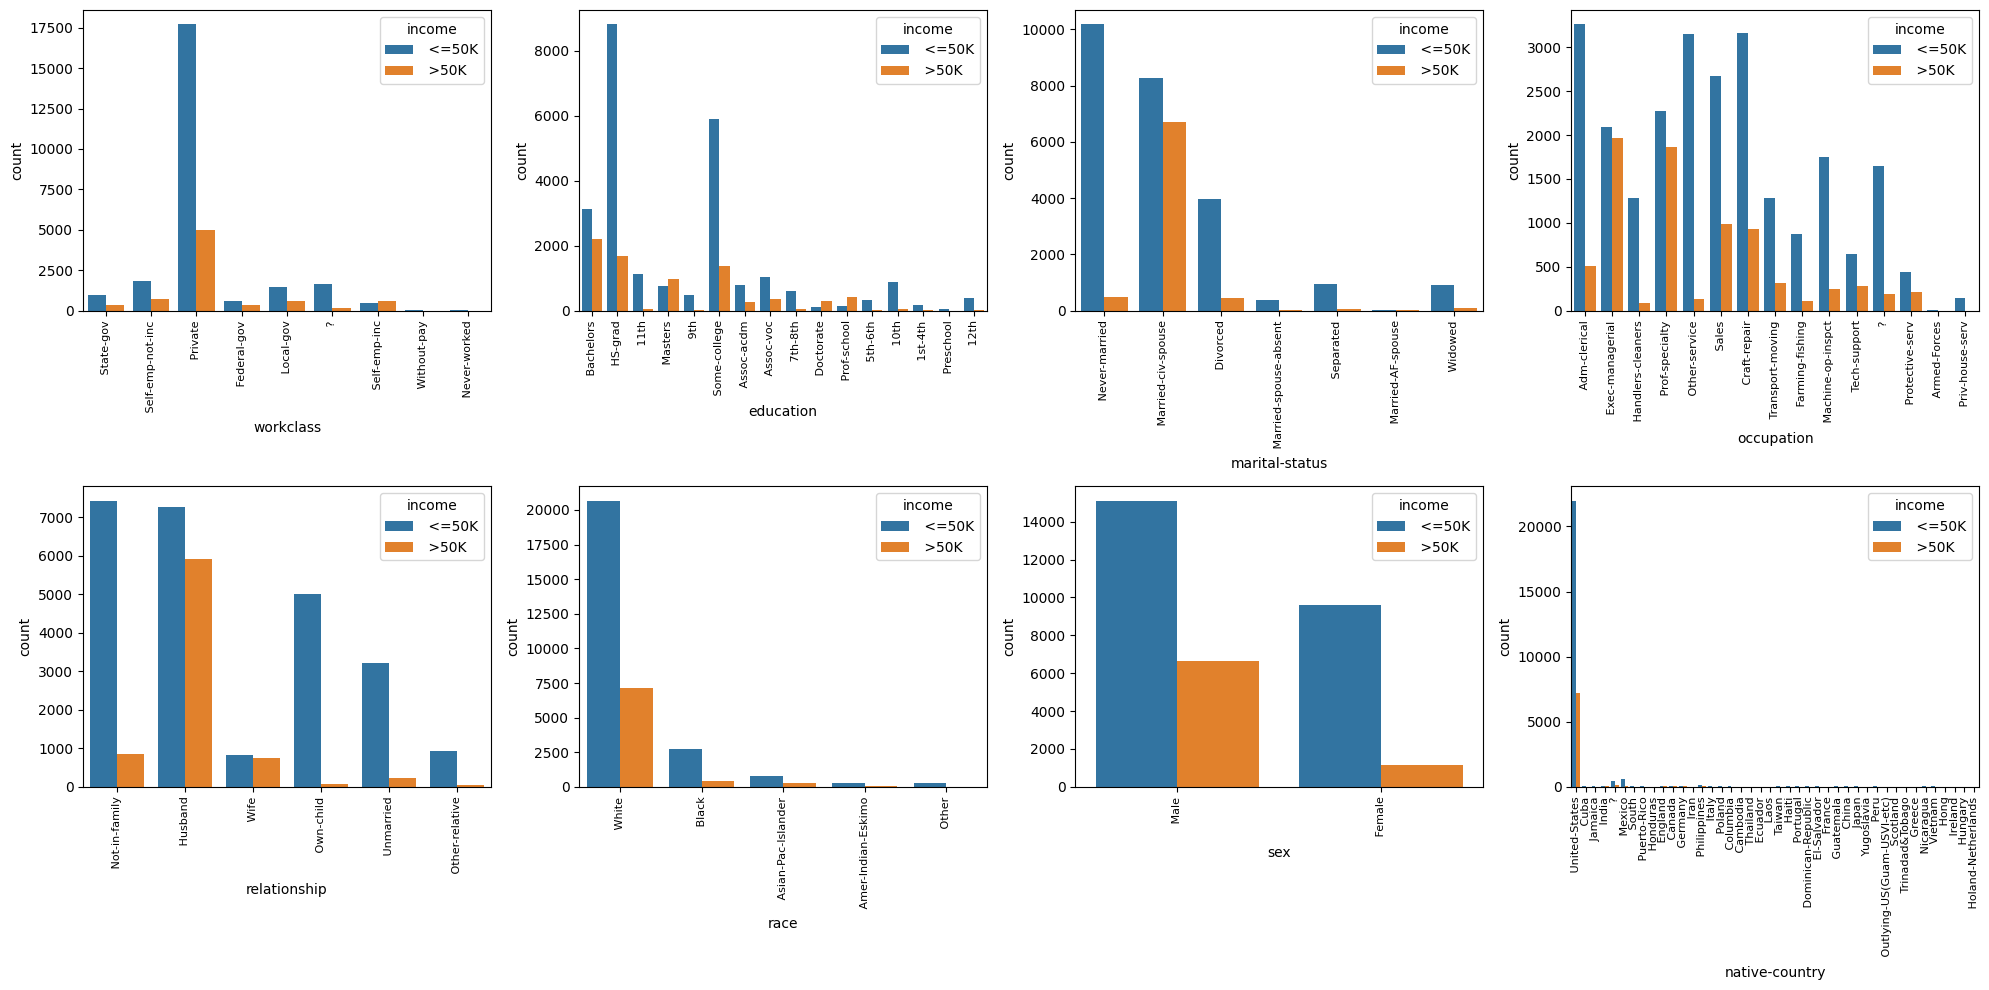

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=[20, 10])
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
for index, col in enumerate(categorical_cols):
    xi, yi = index % 4, index // 4
    sns.countplot(x=col, data=df, hue="income", ax=axs[yi][xi])
    axs[yi][xi].set_xticklabels(axs[yi][xi].get_xticklabels(), rotation=90, fontsize=8)

fig.tight_layout()
plt.show()

From the plot, we can see that the dataset is imbalanced with a majority of individuals having an income of less than or equal to $50,000 per year.

The plots also show that the distributions of the categorical features differ for different income levels. 

For example, those who work in the private sector are more likely to have an income of less than or equal to $50,000 per year, while those who work in executive/managerial positions are more likely to have an income of greater than $50,000 per year. 

Additionally, those who are married and have a spouse are more likely to have an income of greater than $50,000 per year.

### Feature Engineering

We can create a new feature by combining `"capital-gain"` and `"capital-loss"` into a single feature called `"net-capital-gain"`.

In [31]:
df["net-capital-gain"] = df["capital-gain"] - df["capital-loss"]
df.drop(["capital-gain", "capital-loss"], axis=1, inplace=True)

In [35]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country', 'income', 'net-capital-gain'],
      dtype='object')


### Correlation
Correlation measures how strong the linear interdependence between two variables is. An absolute value of correlation closer to 1 is indicative of a string correlation. Printing the correlation of the numerical features with the target variable, we get the output:

In [65]:
df['income'] = [0 if item[1] == '<' else 1 for item in df['income']]

In [70]:
print(df.corr()['income'])

age               0.234037
fnlwgt           -0.009502
education-num     0.335272
capital-gain      0.223336
capital-loss      0.150501
hours-per-week    0.229658
income            1.000000
Name: income, dtype: float64


C:\Users\ishaa\AppData\Local\Temp\ipykernel_15336\3255574124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['income'])


From the output, we can see that `"education-num"`, `"net-capital-gain"`, `"age"`, and `"hours-per-week"` have a moderate correlation with income.